In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
import re

warnings.filterwarnings("ignore")
warnings.filterwarnings('always', category=DeprecationWarning,
                        module=r'^{0}\.'.format(re.escape(__name__)))
from collections import Counter


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
data = pd.read_csv("../input/wine-quality-dataset/WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# Missing data
We have no missing data


In [4]:
for i in [3,4,5]:
    data["quality"] = data["quality"].replace(i,1)
for i in [6,7,8]:
    data["quality"] = data["quality"].replace(i,2)
    
data.quality.unique()

array([1, 2])

In [5]:
data = data.drop(["Id"],axis=1)
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

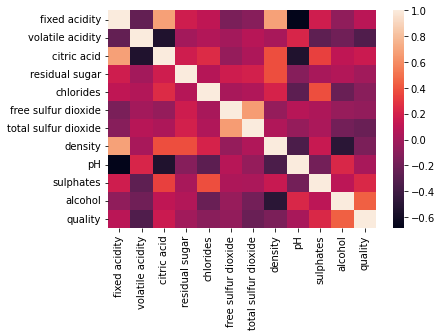

In [6]:
corr = data.corr()
sns.heatmap(corr)

In [7]:
#Y = data[["quality"]]
#data = data.drop(["quality"],axis = 1)

<AxesSubplot:xlabel='count', ylabel='quality'>

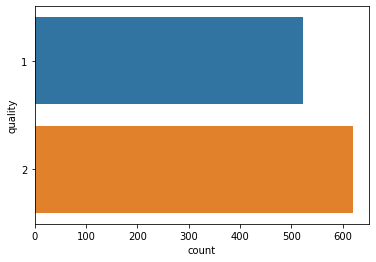

In [8]:
sns.countplot(data=data ,y = data["quality"])

# Outlier Detecetion
Outlier detection with z score 

In [9]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [10]:
outliers = detect_outliers(data,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
data.iloc[outliers,:]
print(outliers)


[248, 259, 260, 311, 382, 397, 399, 400, 404, 462, 103, 275, 278, 289, 366, 787, 965, 1022, 1051, 1053, 1111, 493, 934, 419, 589, 898]


In [11]:
data = data.drop(outliers,axis=0)
Y = data[["quality"]]

# Training the model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [13]:
random_state = 61
clfs = [DecisionTreeClassifier(random_state = random_state),
        SVC(random_state = random_state),
        RandomForestClassifier(random_state = random_state),
        LogisticRegression(random_state = random_state),
        KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(data.drop(["quality"],axis=1),Y)

<AxesSubplot:>

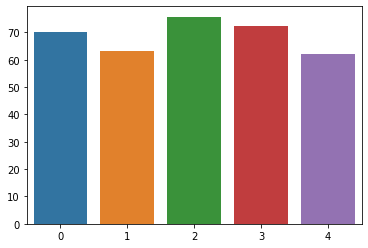

In [15]:
scores = []
for clf in clfs:
    clf.fit(X_train,Y_train)
    scores.append(clf.score(X_test,Y_test))
scores = pd.DataFrame(scores) *100
scores
sns.barplot(data = scores.T)

In [16]:
best_estimator = []
best_scores = []
for i in range(len(clfs)):
    clf = GridSearchCV(clfs[i],
                      classifier_param[i])
    clf.fit(X_train,Y_train)
    best_scores.append(clf.best_score_)
    best_estimator.append(clf.best_estimator_)

print(best_estimator)


[DecisionTreeClassifier(max_depth=5, min_samples_split=110, random_state=61), SVC(C=300, gamma=0.001, random_state=61), RandomForestClassifier(bootstrap=False, max_features=3, min_samples_split=10,
                       random_state=61), LogisticRegression(C=100.0, random_state=61), KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')]


[DecisionTreeClassifier(max_depth=5, min_samples_split=110, random_state=61), SVC(C=300, gamma=0.001, random_state=61), RandomForestClassifier(bootstrap=False, max_features=3, min_samples_split=10,
                       random_state=61), LogisticRegression(C=100.0, random_state=61), KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')]
[0.7323495865412033, 0.7526447105788423, 0.7872825777017394, 0.7598160821214714, 0.7491231822070145]


<AxesSubplot:>

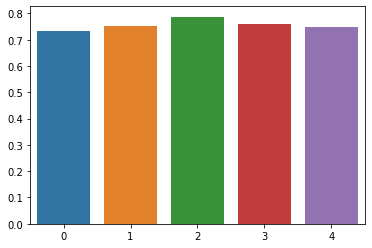

In [17]:
print(best_estimator)
print(best_scores)
sns.barplot(data=pd.DataFrame(best_scores).T)

In [18]:
"""
cv_result = []
best_estimators = []
for i in range(len(clfs)):
    clf = GridSearchCV(clfs[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,Y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])
"""

'\ncv_result = []\nbest_estimators = []\nfor i in range(len(clfs)):\n    clf = GridSearchCV(clfs[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)\n    clf.fit(X_train,Y_train)\n    cv_result.append(clf.best_score_)\n    best_estimators.append(clf.best_estimator_)\n    print(cv_result[i])\n'

In [19]:
"""
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
"""

'\ncv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",\n             "LogisticRegression",\n             "KNeighborsClassifier"]})\n\ng = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)\ng.set_xlabel("Mean Accuracy")\ng.set_title("Cross Validation Scores")\n'